In [1]:
import json, random, time, os, base64
import numpy as np
import os
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from io import BytesIO
import pandas as pd

In [2]:
dataset = json.load(open("./datasets/WebQA/annotations/WebQA_train_val.json", "r"))

# Ensures val selection
val_samples = {}
for key, value in dataset.items():
    if value['split'] == 'val':
        val_samples[key] = value
dataset = val_samples # len = 4966

#n = len(dataset) - 2455    # REMOVES 'text' CATEGORY
n = len(dataset)
#dataset = dataset[:n]
selected_samples = {}
count = 0
for key, value in dataset.items():
    selected_samples[key] = value
    count += 1
    if count >= n:
        break
dataset = selected_samples

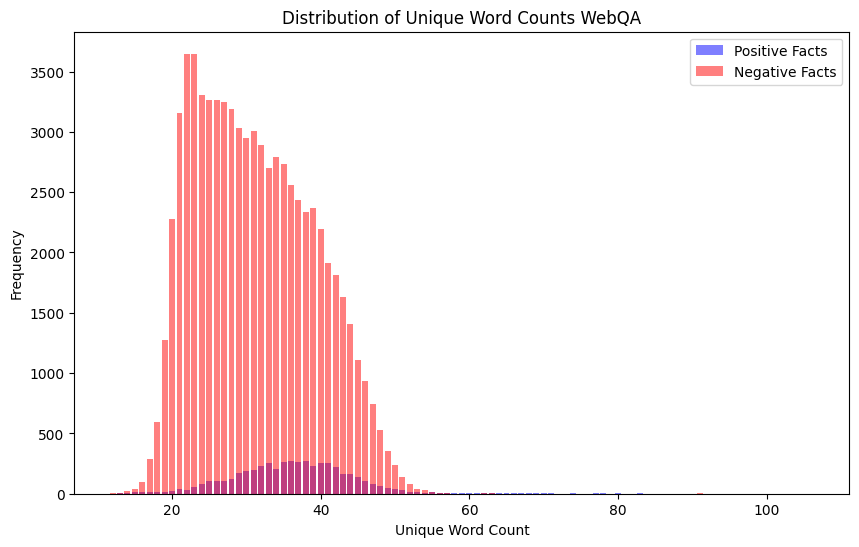

Average Unique Word Count for Positive Facts: 46.81428571428572
Average Unique Word Count for Negative Facts: 43.44827586206897
Average Unique Word Count for Facts: 45.0


In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize dictionaries to store counts of unique word counts
pos_word_counts = defaultdict(int)
neg_word_counts = defaultdict(int)

# Iterate through each sample in the dataset
for sample in dataset.values():
    # Iterate through 'txt_posFacts' and 'txt_negFacts'
    for key in ['txt_posFacts', 'txt_negFacts']:
        for item in sample.get(key, []):
            # Split the 'fact' into words and count the number of unique words
            words = item['fact'].split()
            unique_word_count = len(set(words))
            
            # Update the corresponding dictionary based on the 'key'
            if key == 'txt_posFacts':
                pos_word_counts[unique_word_count] += 1
            elif key == 'txt_negFacts':
                neg_word_counts[unique_word_count] += 1

# Plot the distribution of unique word counts for positive and negative facts
plt.figure(figsize=(10, 6))
plt.bar(pos_word_counts.keys(), pos_word_counts.values(), color='blue', alpha=0.5, label='Positive Facts')
plt.bar(neg_word_counts.keys(), neg_word_counts.values(), color='red', alpha=0.5, label='Negative Facts')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Word Counts WebQA')
plt.legend()
plt.show()

# Calculate the average unique word count for positive and negative facts
avg_pos_word_count = sum(pos_word_counts) / len(pos_word_counts)
avg_neg_word_count = sum(neg_word_counts) / len(neg_word_counts)

print("Average Unique Word Count for Positive Facts:", avg_pos_word_count)
print("Average Unique Word Count for Negative Facts:", avg_neg_word_count)
print("Average Unique Word Count for Facts:", (avg_pos_word_count + avg_neg_word_count) // 2)

In [4]:
import json

dataset = json.load(open("./datasets/MMQA/annotations/MMQA.json", "r"))
missing_guids = ['725cff35b53790928967f609bb24985f', '9c4edd8d739fd174c3e3def12de3e7d8', '074182b0a52f0fd0e740b4f64b30113c', '68e8165c0eed4cd49ae2ed8947dbf41d', '47800dd3d7edae3069eb4e683d1889ef', 'a6cb73d18b79117f01e6d814c07a60f7', '4f183e594eda0238cc1d8f06a8ac4cae', '819e3160f22972d6db17a64a3ba79bb2', '08fac605c314afb1b2121b278dbfc41b', 'ced237f8af0c8f6b8b1989a48f0b0969', 'c45775178d1457f3250348da7f2763a9', '28bbe6fa4a8f5277ba4354085ec4663f', '2576221a02209dfcc4ce4e847c231445', '7664500bdee6462bcdd353d855b077ee', '38027a2b6b1a3d30030572e199d0b885', '4ffd86699e830254993604a40ee1f807', '3635238b6da69b7d89e0eecc3cbfd62b', 'c7b0f4a0bce4148f29dbb78be8e8efbd', '7200b883e81509f5486d3fc8cee35417', 'de4a4b0fdd903eadbf8bc1e60b083467', 'f39db465d59d6a5b2146cb4cf9c8a5e9', '20c33d307142256cebf255fd3b767753', 'f02a2e164a60e8b3a66946b558aab288', '59e62161a30fc6eaee3dc916f66eca0e', '8a39ecdb53fa36aa6c65f4042f54c45f', '9e7649460743d4fb42f1b30558c6ee30', '2494ebf69cf93104339896d73448af5d', '3710f699d71011766460064b5a00ec06', '4840be576c674b4c2f76d567932f8990', 'ccab4dc57019d3e03961f845e7e6cea3', 'b07b21de209a6dbb3c69f42a1f2044e5', 'ff4e4666b70c68522ee408cd874369d3', 'ecbbb1949b144a35fd9f916cb4270a72', '27daa3331e30a8f02c7ede6991fe84a5', '9778cc053c0a0f168309d3d4f40d7230', '9133577d0fbf19f3fc096ce431f7d2f9', '18ff961c71fb70bf1b9888caf790ca08', 'd31bb6e3704b9022a0ed4accdf8ec5d2', 'f70bae73f07c5fe18055500fda9e21d0', '55650fcaa3b2911df0940e46a5721b07']
for guid in missing_guids:
    if guid in dataset:
        dataset.pop(guid)

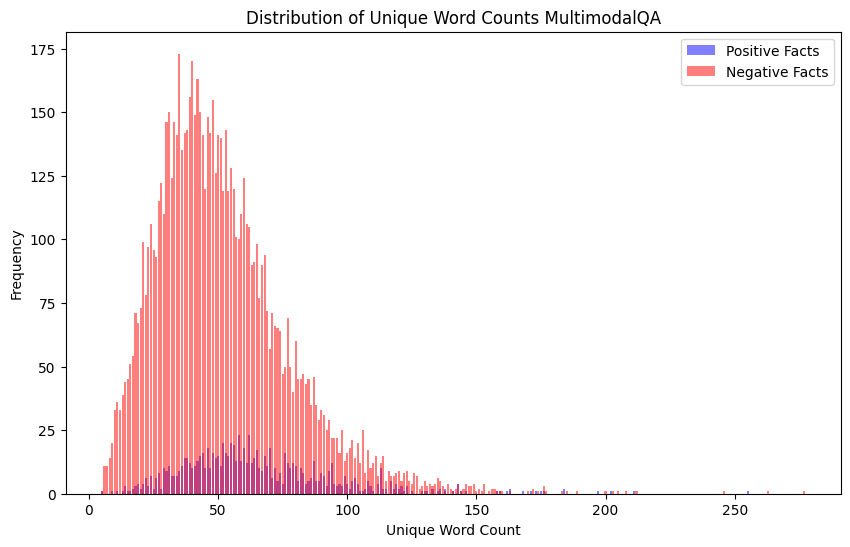

Average Unique Word Count for Positive Facts: 83.55797101449275
Average Unique Word Count for Negative Facts: 93.71511627906976
Average Unique Word Count for Facts: 88.0


In [5]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize dictionaries to store counts of unique word counts
pos_word_counts = defaultdict(int)
neg_word_counts = defaultdict(int)

# Iterate through each sample in the dataset
for sample in dataset.values():
    # Iterate through 'txt_posFacts' and 'txt_negFacts'
    for key in ['txt_posFacts', 'txt_negFacts']:
        for item in sample.get(key, []):
            # Split the 'fact' into words and count the number of unique words
            words = item['fact'].split()
            unique_word_count = len(set(words))
            
            # Update the corresponding dictionary based on the 'key'
            if key == 'txt_posFacts':
                pos_word_counts[unique_word_count] += 1
            elif key == 'txt_negFacts':
                neg_word_counts[unique_word_count] += 1

# Plot the distribution of unique word counts for positive and negative facts
plt.figure(figsize=(10, 6))
plt.bar(pos_word_counts.keys(), pos_word_counts.values(), color='blue', alpha=0.5, label='Positive Facts')
plt.bar(neg_word_counts.keys(), neg_word_counts.values(), color='red', alpha=0.5, label='Negative Facts')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Word Counts MultimodalQA')
plt.legend()
plt.show()

# Calculate the average unique word count for positive and negative facts
avg_pos_word_count = sum(pos_word_counts) / len(pos_word_counts)
avg_neg_word_count = sum(neg_word_counts) / len(neg_word_counts)

print("Average Unique Word Count for Positive Facts:", avg_pos_word_count)
print("Average Unique Word Count for Negative Facts:", avg_neg_word_count)
print("Average Unique Word Count for Facts:", (avg_pos_word_count + avg_neg_word_count) // 2)